 Delivery_time -> Predict delivery time using sorting time.

In [2]:
#load the libraries
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("/content/delivery_time.csv")
data.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [34]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [35]:
data.corr() # we found out corelation between the two variables which is 0.82. This is a good correlation.

delivery_time  sorting_time
delivery_time       1.000000      0.825997
sorting_time        0.825997      1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


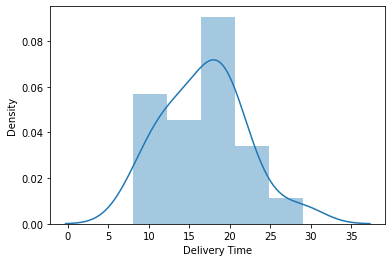

In [27]:
import seaborn as sns
sns.distplot(data['Delivery Time']) # Plot the density graph to check the distribution of data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


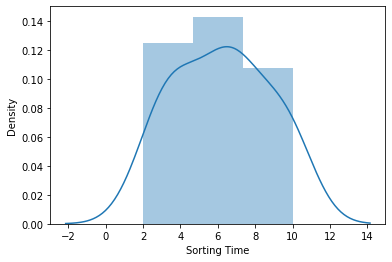

In [28]:
import seaborn as sns
sns.distplot(data['Sorting Time'])

Fitting a linear regression model:

In [22]:
import statsmodels.formula.api as smf

In [38]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

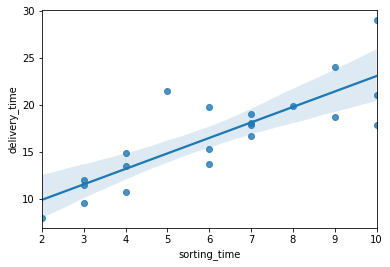

In [39]:
sns.regplot(x="sorting_time", y="delivery_time", data=data);

Now we have to test the model.

In [40]:
#Coefficients
model.params 

Intercept       6.582734
sorting_time    1.649020
dtype: float64

From above result we can see that the Bo =  6.582734 And B1= 1.64


In [41]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


We can see that P value for slope is = 0.000004 < 0.05.

In [43]:
#R squared values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

As Rsquare value is 0.68 it is moderate model

Now we can Predict the new data point 

In [44]:
#Predict for sorting time 11 and 13
newdata=pd.Series([11,13])

In [45]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [46]:
data_pred

sorting_time
0            11
1            13

In [47]:
model.predict(data_pred)

0    24.721953
1    28.019993
dtype: float64